In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
#change to desired path to the part2-DiffusionModels folder
# %pwd
# %cd drive
# %cd MyDrive
# %cd unet-project
# %cd src
os.chdir("drive/MyDrive/unet-project/src")
%pwd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/unet-project/src'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
from sklearn.metrics import classification_report
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
from models import UNetClassifier
from tqdm.notebook import tqdm


In [4]:
!unzip -q "OCT.zip" -d /content
# data_dir = 'drive/MyDrive/2025/DL/unet_project/OCT'

In [39]:

%cd ../


/content


## Data

In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(2),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dir = 'OCT/train'
train_dataset = datasets.ImageFolder(train_dir, data_transforms)

subset_size = 3000
indices = torch.randperm(len(train_dataset))[:subset_size]
train_dataset = Subset(train_dataset, indices)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dir = 'OCT/test'
test_dataset = datasets.ImageFolder(test_dir, data_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [26]:
print("Classes:", train_dataset.dataset.classes)


Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


## Train

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNetClassifier(in_channels=1, out_channels=4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=5,
    verbose=True
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [30]:
num_epochs = 40
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Create progress bar for each epoch
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')

    for images, labels in pbar:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        outputs = outputs.mean(dim=(2, 3))

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Update progress bar with current loss
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})

    epoch_loss = running_loss/len(train_loader)
    scheduler.step(epoch_loss)
    print(f"\nEpoch {epoch+1}/{num_epochs}, Average Loss: {epoch_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 1/40, Average Loss: 0.9291


Epoch 2/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 2/40, Average Loss: 0.6770


Epoch 3/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 3/40, Average Loss: 0.6293


Epoch 4/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 4/40, Average Loss: 0.5798


Epoch 5/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 5/40, Average Loss: 0.5613


Epoch 6/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 6/40, Average Loss: 0.5279


Epoch 7/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 7/40, Average Loss: 0.4962


Epoch 8/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 8/40, Average Loss: 0.4740


Epoch 9/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 9/40, Average Loss: 0.4621


Epoch 10/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 10/40, Average Loss: 0.4179


Epoch 11/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 11/40, Average Loss: 0.4485


Epoch 12/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 12/40, Average Loss: 0.4055


Epoch 13/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 13/40, Average Loss: 0.3640


Epoch 14/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 14/40, Average Loss: 0.3616


Epoch 15/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 15/40, Average Loss: 0.3413


Epoch 16/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 16/40, Average Loss: 0.3501


Epoch 17/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 17/40, Average Loss: 0.3379


Epoch 18/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 18/40, Average Loss: 0.3547


Epoch 19/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 19/40, Average Loss: 0.2958


Epoch 20/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 20/40, Average Loss: 0.3003


Epoch 21/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 21/40, Average Loss: 0.2799


Epoch 22/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 22/40, Average Loss: 0.2782


Epoch 23/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 23/40, Average Loss: 0.2531


Epoch 24/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 24/40, Average Loss: 0.2330


Epoch 25/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 25/40, Average Loss: 0.2244


Epoch 26/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 26/40, Average Loss: 0.2274


Epoch 27/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 27/40, Average Loss: 0.2131


Epoch 28/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 28/40, Average Loss: 0.2179


Epoch 29/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 29/40, Average Loss: 0.2144


Epoch 30/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 30/40, Average Loss: 0.1943


Epoch 31/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 31/40, Average Loss: 0.1974


Epoch 32/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 32/40, Average Loss: 0.1886


Epoch 33/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 33/40, Average Loss: 0.2001


Epoch 34/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 34/40, Average Loss: 0.2047


Epoch 35/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 35/40, Average Loss: 0.1907


Epoch 36/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 36/40, Average Loss: 0.1898


Epoch 37/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 37/40, Average Loss: 0.1822


Epoch 38/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 38/40, Average Loss: 0.1678


Epoch 39/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 39/40, Average Loss: 0.1747


Epoch 40/40:   0%|          | 0/94 [00:00<?, ?it/s]


Epoch 40/40, Average Loss: 0.1647


# Validation

In [31]:
# validate model
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        outputs = outputs.mean(dim=(2, 3))
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

print(classification_report(all_labels, all_preds,
                          target_names=train_dataset.dataset.classes))

              precision    recall  f1-score   support

         CNV       0.88      0.98      0.93       250
         DME       0.93      0.98      0.95       250
      DRUSEN       0.99      0.81      0.89       250
      NORMAL       0.95      0.97      0.96       250

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



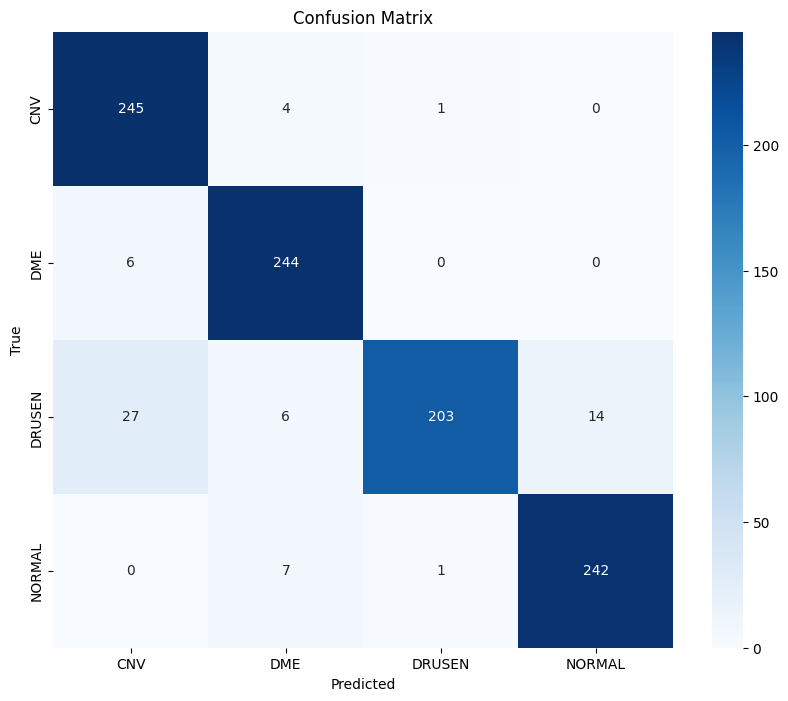

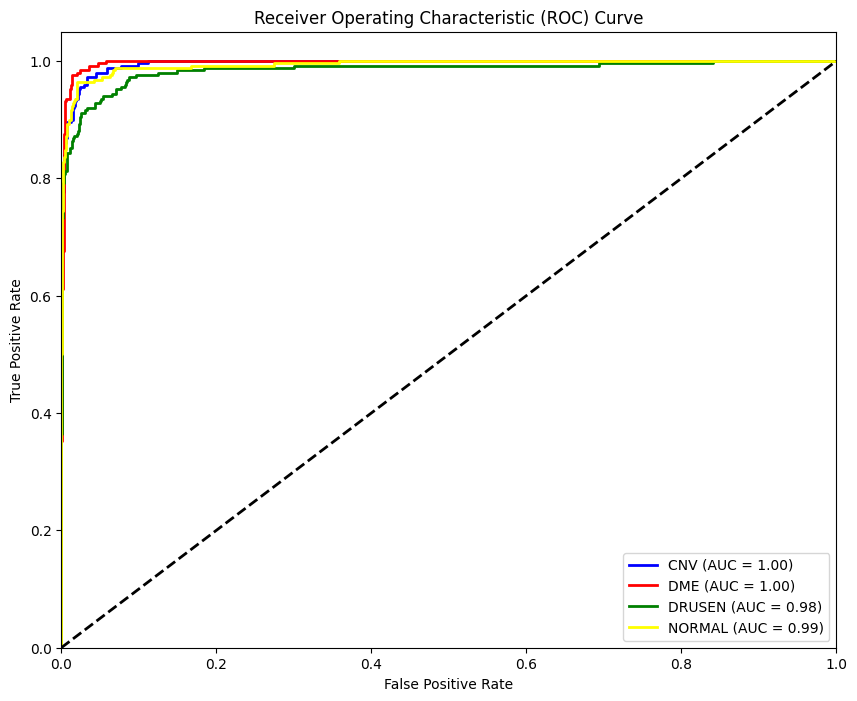

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Confusion Matrix
plt.figure(figsize=(10,8))
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_dataset.dataset.classes,
            yticklabels=train_dataset.dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# AUC-ROC Curve
n_classes = len(train_dataset.dataset.classes)
y_test_bin = label_binarize(all_labels, classes=range(n_classes))

model.eval()
probs_list = []
with torch.no_grad():
    for images, _ in test_loader:
        images = images.to(device)
        outputs = model(images)
        outputs = outputs.mean(dim=(2, 3))
        probs = torch.softmax(outputs, dim=1).cpu().numpy()
        probs_list.append(probs)

y_score = np.vstack(probs_list)

# Plot
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2,
             label=f'{train_dataset.dataset.classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Other Val Stuff

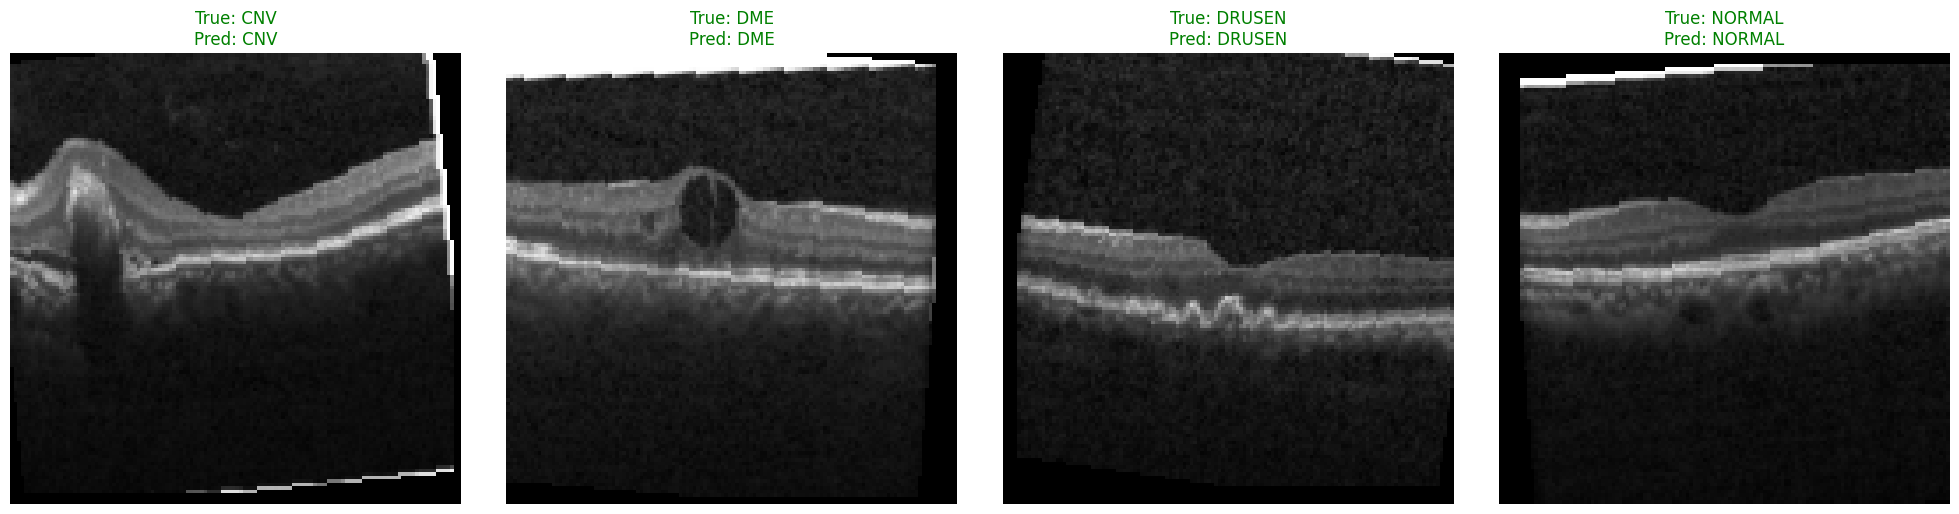

In [40]:
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(20, 5))
classes = train_dataset.dataset.classes

# Get one example from each class
examples = {c: None for c in range(len(classes))}
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        for img, label in zip(images, labels):
            if examples[label.item()] is None:
                examples[label.item()] = (img, label)
        if all(v is not None for v in examples.values()):
            break

# Plot each example with its prediction
for i, (img, label) in enumerate(examples.values()):
    plt.subplot(1, 4, i + 1)

    # Get model prediction
    img_tensor = img.unsqueeze(0).to(device)
    output = model(img_tensor)
    output = output.mean(dim=(2, 3))
    pred = torch.argmax(output, dim=1).cpu().item()

    # Display image
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f'True: {classes[label]}\nPred: {classes[pred]}',
              color='green' if pred == label else 'red')

plt.tight_layout()
plt.show()

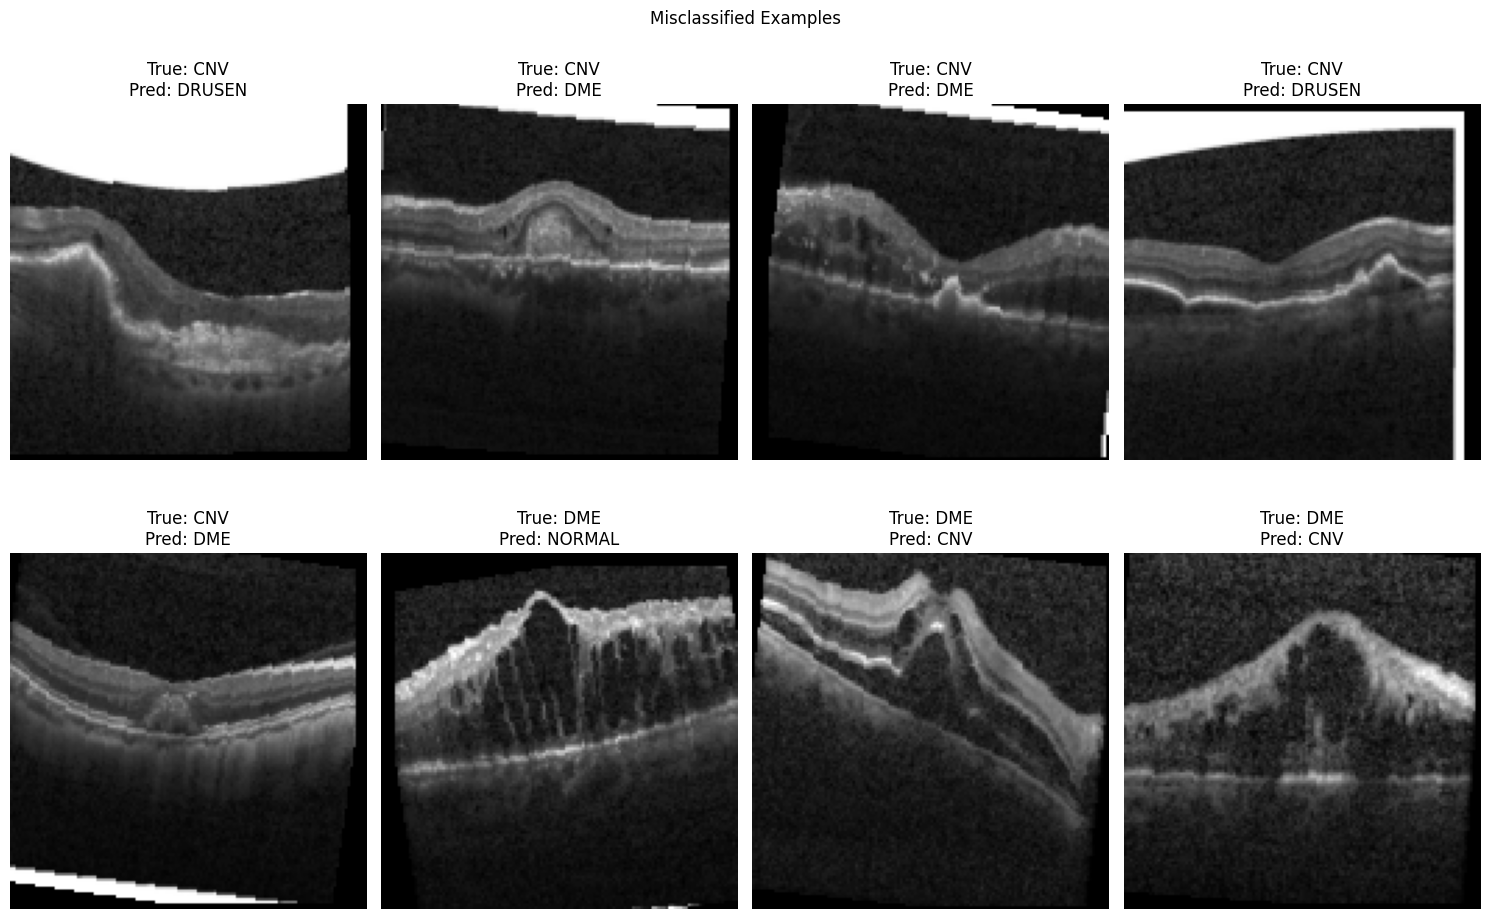

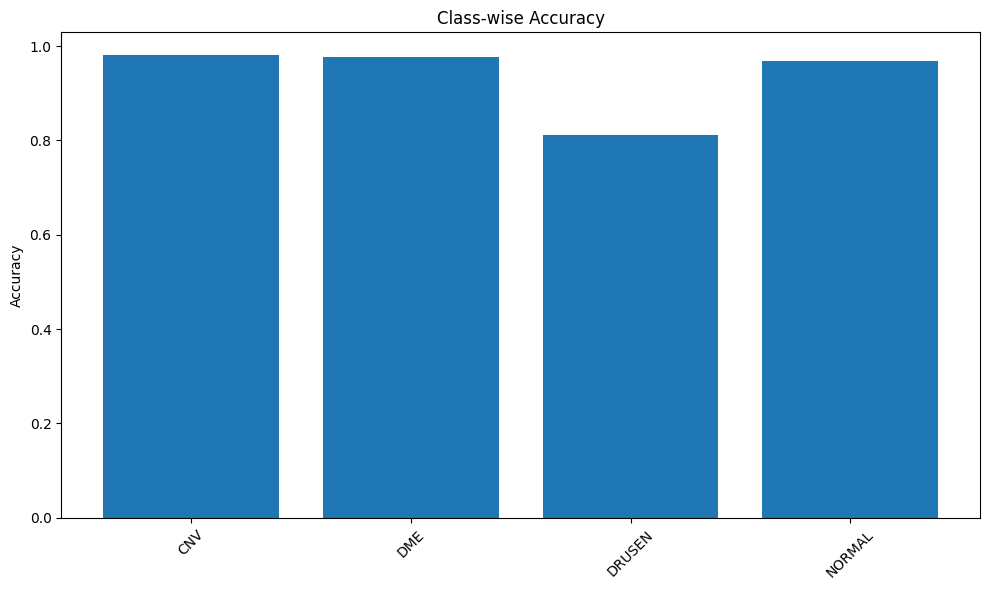

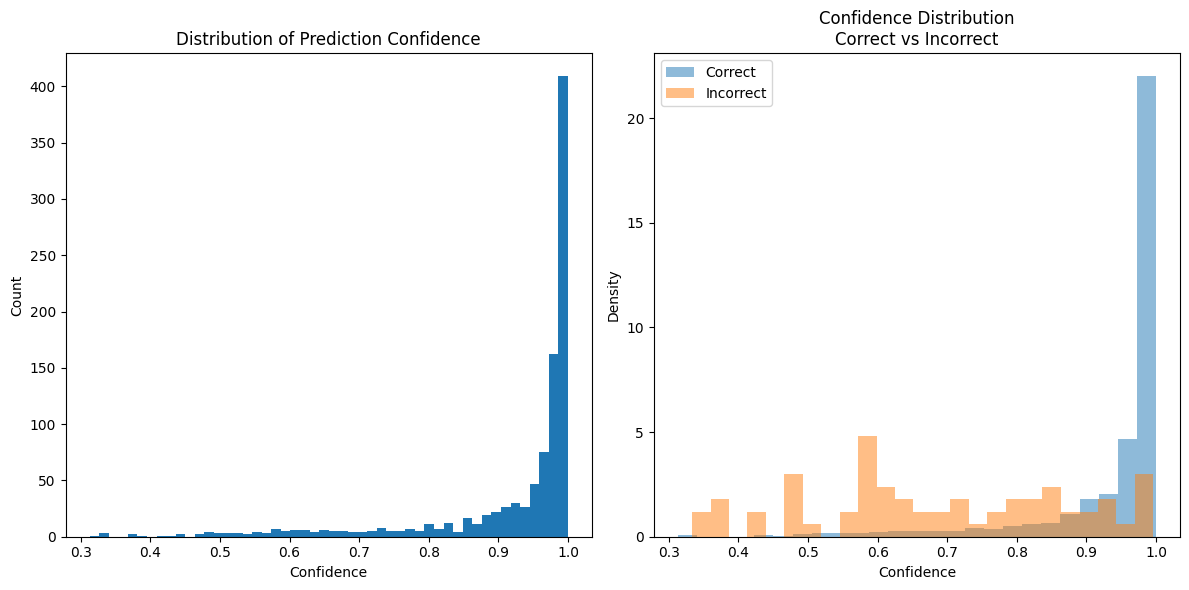

In [41]:
# Misclassified Examples
plt.figure(figsize=(15, 10))
misclassified = []
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        outputs = outputs.mean(dim=(2, 3))
        preds = torch.argmax(outputs, dim=1).cpu()

        # Find misclassified examples
        mask = preds != labels
        if mask.any():
            misclassified.extend(list(zip(
                images[mask].cpu(),
                labels[mask].cpu(),
                preds[mask].cpu()
            )))
        if len(misclassified) >= 8:
            break

# Plot 8 misclassified examples
for idx, (img, true, pred) in enumerate(misclassified[:8]):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f'True: {train_dataset.dataset.classes[true]}\nPred: {train_dataset.dataset.classes[pred]}')

plt.suptitle('Misclassified Examples')
plt.tight_layout()
plt.show()

# Class-wise Accuracy Bar Plot
plt.figure(figsize=(10, 6))
class_accuracies = []
for i in range(len(train_dataset.dataset.classes)):
    mask = np.array(all_labels) == i
    class_acc = np.mean(np.array(all_preds)[mask] == i)
    class_accuracies.append(class_acc)

plt.bar(train_dataset.dataset.classes, class_accuracies)
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prediction Confidence Distribution
plt.figure(figsize=(12, 6))
confidences = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        outputs = outputs.mean(dim=(2, 3))
        probs = torch.softmax(outputs, dim=1)
        conf, preds = torch.max(probs, dim=1)
        confidences.extend(conf.cpu().numpy())
        true_labels.extend((preds.cpu() == labels).numpy())

plt.subplot(1, 2, 1)
plt.hist(confidences, bins=50)
plt.title('Distribution of Prediction Confidence')
plt.xlabel('Confidence')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
correct_conf = np.array(confidences)[np.array(true_labels) == 1]
wrong_conf = np.array(confidences)[np.array(true_labels) == 0]
plt.hist(correct_conf, bins=25, alpha=0.5, label='Correct', density=True)
plt.hist(wrong_conf, bins=25, alpha=0.5, label='Incorrect', density=True)
plt.title('Confidence Distribution\nCorrect vs Incorrect')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
os.chdir("drive/MyDrive/unet-project/")
%pwd

'/content/drive/MyDrive/unet-project'

In [35]:
save_path = os.path.join(os.getcwd(), "unet_oct_classifier.pth")
torch.save(model.state_dict(), save_path)
print(f"Model saved to: {save_path}")

Model saved to: /content/drive/MyDrive/unet-project/unet_oct_classifier.pth
